<a href="https://colab.research.google.com/github/machine-perception-robotics-group/MPRGDeepLearningLectureNotebook/blob/master/01_dnn_scratch/Perceptron_AND_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 単純パーセプトロンによるAND回路の作成

---

単純パーセプトロンでAND出力ができるように学習してみよう！

まずはライブラリ（numpyとmatplotlib）をimportし、入力データxとその教師ラベルy_trainを設定します．

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 入力データと教師ラベル
x = np.asarray([[0,0],[1,0],[0,1],[1,1]], dtype=np.float64)
y_train = np.asarray([0, 0, 0, 1], dtype=np.float64)

## ネットワークモデルの定義
単純パーセプトロンを定義します．

まずはじめに，ネットワークの定義に必要なシグモイド関数を定義します．

In [3]:
# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

上で定義したシグモイド関数を用いてネットワークモデルを作成します．
ここでは，入力層，出力層から構成される単純パーセプトロンを定義することとし，1サンプルのデータを入力して結果を出力するようなネットワークを定義します．

入力層のユニット数は引数として与え，`input_size`とします．
そして，`__init__`関数を用いて，ネットワークのパラメータを初期化します．
`w`は重みで，`b`はバイアスを表しています．
重みは`randn`関数で，標準正規分布に従った乱数で生成した値を保有する配列を生成します．
バイアスは`zeros`関数を用いて，要素が全て0の配列を生成します．

そして，`forward`関数で，データを入力して結果を出力するための演算を定義します．

次に，`backward`関数ではパラメータの更新量を計算します．
まず，ネットワークの出力結果と教師ラベルから，誤差`dy`を算出します．
その後，勾配を計算し，パラメータの更新量を`self.grads`へ保存しておきます．

また，`update_parameters`関数で，更新量をもとにパラメータの更新を行う関数を定義します．ここでは，`backward`関数によって計算した勾配と更新量（`lr`）によって，現在のパラメータを更新します．


In [4]:
# 単純パーセプトロンの定義
class Perceptron:

    def __init__(self, input_size, w_std=0.01):
        self.w = w_std * np.random.randn(input_size, 1)
        self.b = 0.0
        self.grads = {}

    def forward(self, x):
        self.h = np.dot(x, self.w) + self.b
        self.y = sigmoid(self.h)
        return self.y

    def backward(self, x, t):
        self.grads = {}

        d_h = -1 * (t - self.y) * sigmoid_grad(self.h)
        self.grads['w'] = np.dot(x.T, d_h)
        self.grads['b'] = np.sum(d_h, axis=0)

    def update_parameters(self, lr=0.1):
        self.w -= lr * self.grads['w']
        self.b -= lr * self.grads['b']

入力層２（`input_size = 2`）となるMLPのモデルを作成します。
重みとバイアスの初期値を設定する際に、標準偏差1.0（`w_std=1.0`）の乱数を設定します。
定義した`display_model_parameters`関数により初期値を表示して，重みとバイアスのそれぞれの値を確認しましょう．

In [5]:
# モデルのパラメータを表示
def display_model_parameters(model):
  print("w:", model.w, "b:", model.b)

# モデルの作成
input_size = 2
model = Perceptron(input_size=input_size, w_std=1.0)

# モデルパラメータの初期値を表示
display_model_parameters(model)

w: [[-1.51471553]
 [ 1.26756731]] b: 0.0


## 単純パーセプトロンの学習
作成したネットワークを用いて，学習を行います．
ここでは1サンプルずつデータを入力た場合のその出力結果と教師ラベルから誤差を算出し，パラメータの更新を行います．

各更新において，学習用データと教師データをそれぞれ`input`と`label`とします．
学習モデルに`input`を与えて，分類結果である`y_pred`を取得します．
取得した`y_pred`は精度および誤差を算出するための関数へと入力され，値を保存します．
次に，誤差を`backward`関数で逆伝播し，`update_parameters`でネットワークの更新を行います．

In [6]:
# 学習パラメータの設定
num_train_data = 4
epoch_num = 500
learning_rate = 1.0

epoch_list = []
train_loss_list = []
train_accuracy_list = []

iteration = 0
for epoch in range(1, epoch_num + 1, 1):
    sum_loss = 0.0

    for i in range(0, num_train_data, 1):
        input = x[i:i+1]
        label = y_train[i:i+1]

        y_pred = model.forward(input)

        sum_loss += np.sum(np.power(y_pred - label, 2))

        model.backward(input, label.reshape(-1, 1))
        model.update_parameters(lr=learning_rate)

    # 学習途中のlossの保存
    epoch_list.append(epoch)
    train_loss_list.append(sum_loss)
    print("epoch: {}, loss: {}".format(epoch, sum_loss))

# モデルのパラメータを表示
display_model_parameters(model)

epoch: 1, loss: 1.2903406812077896
epoch: 2, loss: 1.2231959817321283
epoch: 3, loss: 1.1586499614409038
epoch: 4, loss: 1.0971954577162761
epoch: 5, loss: 1.039127706850878
epoch: 6, loss: 0.9845700971046647
epoch: 7, loss: 0.9335085584541205
epoch: 8, loss: 0.8858323728079733
epoch: 9, loss: 0.8413778418261544
epoch: 10, loss: 0.7999661496038313
epoch: 11, loss: 0.7614266330802941
epoch: 12, loss: 0.7256031289419655
epoch: 13, loss: 0.6923486987376319
epoch: 14, loss: 0.6615172228796922
epoch: 15, loss: 0.6329581388413583
epoch: 16, loss: 0.6065160881178155
epoch: 17, loss: 0.5820339279075946
epoch: 18, loss: 0.5593567137572701
epoch: 19, loss: 0.5383350411892349
epoch: 20, loss: 0.518827224829993
epoch: 21, loss: 0.5007004658081752
epoch: 22, loss: 0.48383135267671384
epoch: 23, loss: 0.46810597832292855
epoch: 24, loss: 0.45341983449896944
epoch: 25, loss: 0.4396775578601137
epoch: 26, loss: 0.4267925600629364
epoch: 27, loss: 0.41468656320038166
epoch: 28, loss: 0.4032890627710258

## 学習推移のグラフ化

上の学習プログラムで保存しておいた誤差をグラフ化します．


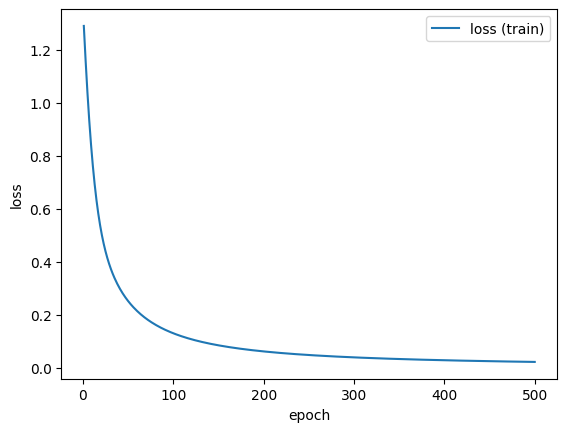

In [7]:
plt.figure()
plt.plot(epoch_list, train_loss_list, label='loss (train)')
plt.xlabel("epoch")     # x軸ラベル
plt.ylabel("loss")      # y軸ラベル
plt.legend()            # 凡例
plt.show()

# 出力の表示
x1とx2の値を生成し，出力結果を可視化します．

**作成した図の保存**

`plt.savefig("保存ファイル名.pdf")`を実行することで，作成した図をファイルとして保存することができます．
この時，ファイル名の拡張子を`.png`や`.jpg`などにすることで，任意のファイルフォーマットで図を保存することができます．
レポートや論文，スライドに使用する図を作成する場合は，ベクタ画像のPDFで保存することをお勧めします．

**Google Colab.上で作成した図のダウンロード**

Google Colab.上で実行している場合，画面左側のフォルダアイコン部分をクリックすることで，Colab.上のファイルを閲覧することが可能となります．
ファイル名右側の「$\vdots$」アイコンをクリックし，ダウンロードを選択することで，作成したPDFを自身のPCへダウンロードすることができます．

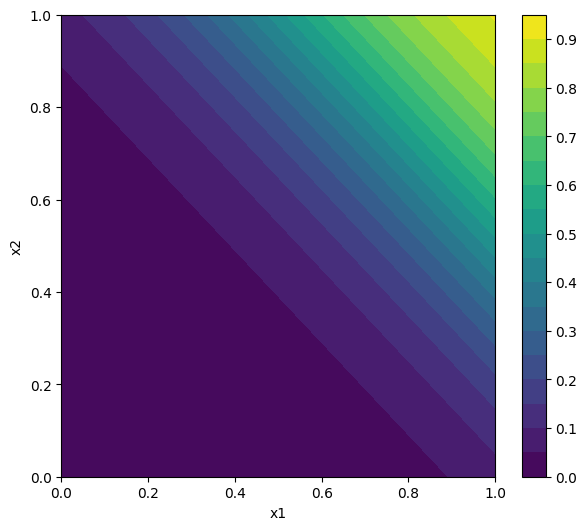

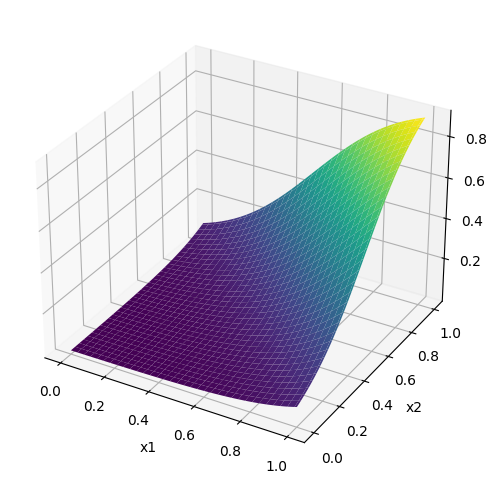

In [8]:
# x1とx2の生成
x1 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
x2 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
X1, X2 = np.meshgrid(x1, x2)

# 入力x1とx2の出力を計算しvalに代入
val = []

for v in x2:
  for u in x1:
    input = u, v
    val.append(model.forward(input))

val = np.asarray(val)
val = val.reshape(X1.shape)

# 等高線表示(PDFにセーブ)
fig, ax = plt.subplots(figsize=(7,6))
surf = ax.contourf(X1, X2, val, 20, cmap='viridis')
fig.colorbar(surf)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.savefig("Perceptron-2D.pdf")
plt.show()

# 3D表示 (PDFにセーブ)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, val, cmap='viridis')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.savefig("Perceptron-3D.pdf")
plt.show()

## 課題
1. 学習率 lr の値を変更すると， 学習曲線と重みがどのように変更するか試してみよう
2. バイアス b をbackwardの際に更新しないように変更し学習できるか試してみよう
2. ORの出力を学習するように変更してみよう
3. XORを学習するように変更してみよう
4. 0000~1111を入力し、10進数の値を学習するように変更してみよう
   （input_size = 4, num_train_data = 16）
